# Multi-options model

In [1]:
from prayas import *

The experiment consists of multiple variants and in each variant the visitor has one ore more options to choose. A detailed explanation of the methodology is available in *[Bayesian A/B Testing for Business Decisions](https://arxiv.org/abs/2003.02769)* by Shafi Kamalbasha and Manuel J. A. Eugster (2020).

In this example, the experiment consists of two variants with each variant having `9` different options from which the visitor can choose:

In [2]:
m = MultiOptionsModel(variants=["Original", "Progressive"],
                      options=[9, 9],
                      baseline="Original")

In addition to the *conversion* measure, we are also interested in measuring the *revenue* and the *gain* both in Euro:

In [3]:
rev_a = [27.95,  47.95,  63.95, 
         35.95,  63.95,  79.95,
         79.95, 151.95, 223.95]
rev_b = [34.95,  59.95,  79.95,
         37.95,  67.95,  84.95,
         69.95, 132.95, 195.95]

m.add_measure("revenue", 
              success_value=[rev_a, rev_b])

m.add_measure("gain", 
              success_value=[rev_a, rev_b],
              nonsuccess_value=[np.repeat(-0.06, 9),
                                np.repeat(-0.04, 9)])

The full model specification for this experiment is:

In [4]:
print(m)

Multi-options model
Variants              : Original, Progressive
Baseline              : Original
Measures              : conversion, revenue, gain
Primary measure       : conversion
Maximum loss threshold: 0.05            


Set the result of the experiment:

In [5]:
m.set_result(successes=[[50, 5, 5, 28, 7, 5, 20, 1, 6],
                        [28, 3, 6, 30, 6, 5, 27, 6, 3]],
             trials=[8067, 8082])

Investigate the result:

<module 'matplotlib.pyplot' from '/Users/manuel.eugster/Library/anaconda3/envs/prayas/lib/python3.7/site-packages/matplotlib/pyplot.py'>

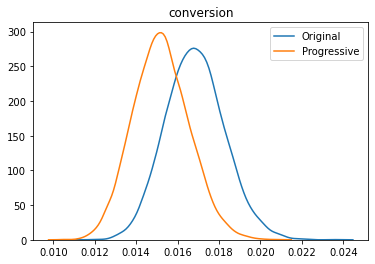

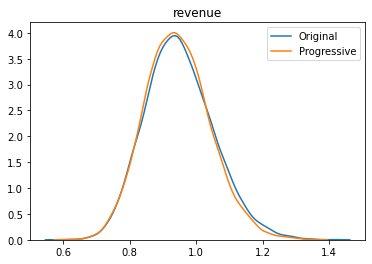

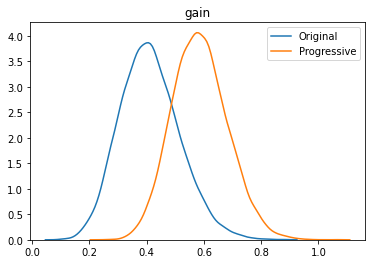

In [6]:
m.plot()

The plot provides the posteriors of the measures 'conversion rate', 'revenue', and 'gain'. We can already see that for different measures the location of the posteriors to each other is different.

Get details on the result:

In [7]:
m.score_baseline()

,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss
0,Progressive,gain,0.88890,0.88720,42.161829,2.019506,42.151239,1.899431
1,Original,conversion,0.80300,0.00000,0.000000,0.000000,10.804070,1.443896
2,Original,revenue,0.51385,0.00000,0.000000,0.000000,0.611517,5.728294
3,Progressive,revenue,0.48615,0.48925,-0.625947,6.292482,-0.607800,6.323280
4,Progressive,conversion,0.19700,0.20400,-9.780902,11.045535,-9.750608,11.101930
5,Original,gain,0.11110,0.00000,0.000000,0.000000,-29.652389,31.117366


The progressive variant has lower conversion rates than the original variant (-10% on average) but the revenue per visitor is almost the same for both variants since the probability to be best is almost 50% for both variants; both variants are equally likely to be the best. The progressive variant has less conversions for the lower priced option compared to the original, but makes up for the lost revenue with higher conversions on the premium product. For the metric gain per visitor, progressive discount had the highest probability to be best with a low expected loss of 2%.